In [34]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [43]:
a = 0.0
b = 1.0
n = 11
x = np.linspace(a, b, n).reshape((-1, 1))
y = np.linspace(a, b, n).reshape((-1, 1))
xx, yy = np.meshgrid(x, y)
x = xx.reshape((-1, 1))
y = yy.reshape((-1, 1))

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]


In [36]:
def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    return [(rs.randn(insize, outsize) * scale,   # W
             rs.randn(outsize) * scale)           # b
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

params = init_random_params(0.1, layer_sizes=[2, 20, 1])

def N(params, x, y):
    inputs = np.concatenate((x, y), axis=1)
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = np.tanh(outputs)
    return outputs

In [37]:
N_y = elementwise_grad(N, 2)

In [60]:
def analytic(x, y):
    return y**2*np.sin(np.pi * x)
def g(x):
    return 2*np.sin(np.pi * x)
def B(x, y):
    return y*(g(x) - ((1-x)*g(0) + x*g(1)))

In [39]:
def psy_trial(params, x, y):
    ums = np.broadcast_to(np.array([1.0]),(x.shape[0],1))
    return B(x,y) + x*(1-x)*y*(N(params, x, y) - N(params, x, ums) - N_y(params, x, ums))

psy_trial_yy = elementwise_grad(elementwise_grad(psy_trial, 2), 2)
psy_trial_xx = elementwise_grad(elementwise_grad(psy_trial, 1), 1)

def f(x):
    return (2 - np.pi**2*y**2)*np.sin(np.pi*x)
def objective(params, step):
    return np.sum((psy_trial_xx(params, x, y) + psy_trial_yy(params, x, y) - f(x))**2)


(121, 1)
(121, 1)


In [41]:
def callback(params, step, g):
        if step % 1000 == 0:
            print("Iteration {0:3d} objective {1}".format(step,
                                                          objective(params, step)))

In [42]:
params = adam(grad(objective), params,
          step_size=0.001, num_iters=20000, callback=callback)

Iteration   0 objective 4452.450014415823
Iteration 1000 objective 13.141172920460718
Iteration 2000 objective 9.790528723665716
Iteration 3000 objective 3.945838052985185
Iteration 4000 objective 0.857993982131225
Iteration 5000 objective 0.39177757002769065
Iteration 6000 objective 0.2094404499442134
Iteration 7000 objective 0.13065502756095085
Iteration 8000 objective 0.10359959682462985
Iteration 9000 objective 0.08381989412833736
Iteration 10000 objective 0.06458465889762473
Iteration 11000 objective 0.047795244227351284
Iteration 12000 objective 0.03424807038364744
Iteration 13000 objective 0.023501498764165678
Iteration 14000 objective 0.014046210045597323
Iteration 15000 objective 0.006716265662445811
Iteration 16000 objective 0.005395140297513668
Iteration 17000 objective 0.002567083994367988
Iteration 18000 objective 0.001862594430752618
Iteration 19000 objective 0.0015440967344258212


[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]] [[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
(11, 11)


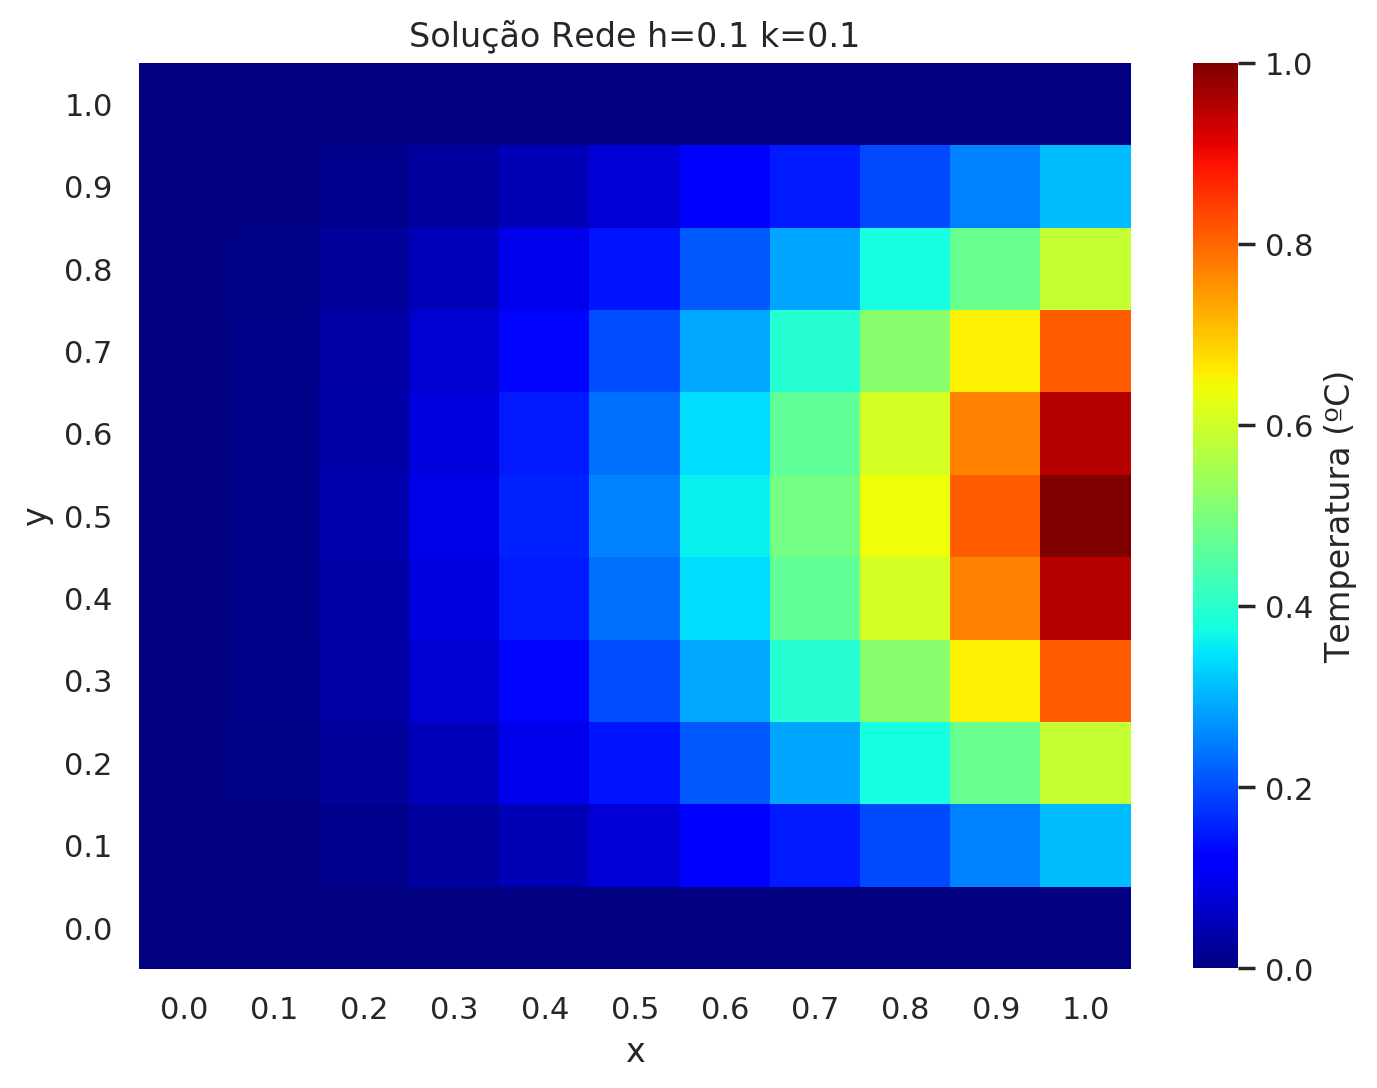

In [65]:
res = gera_u(psy_trial, n, n, a, b)
# print(u(params, [[0.1]], [[0.1]])[0][0])
print(res.shape)
print_res(res, n, n, -1, a, b, h, k, metodo="Rede", print_annot=False)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


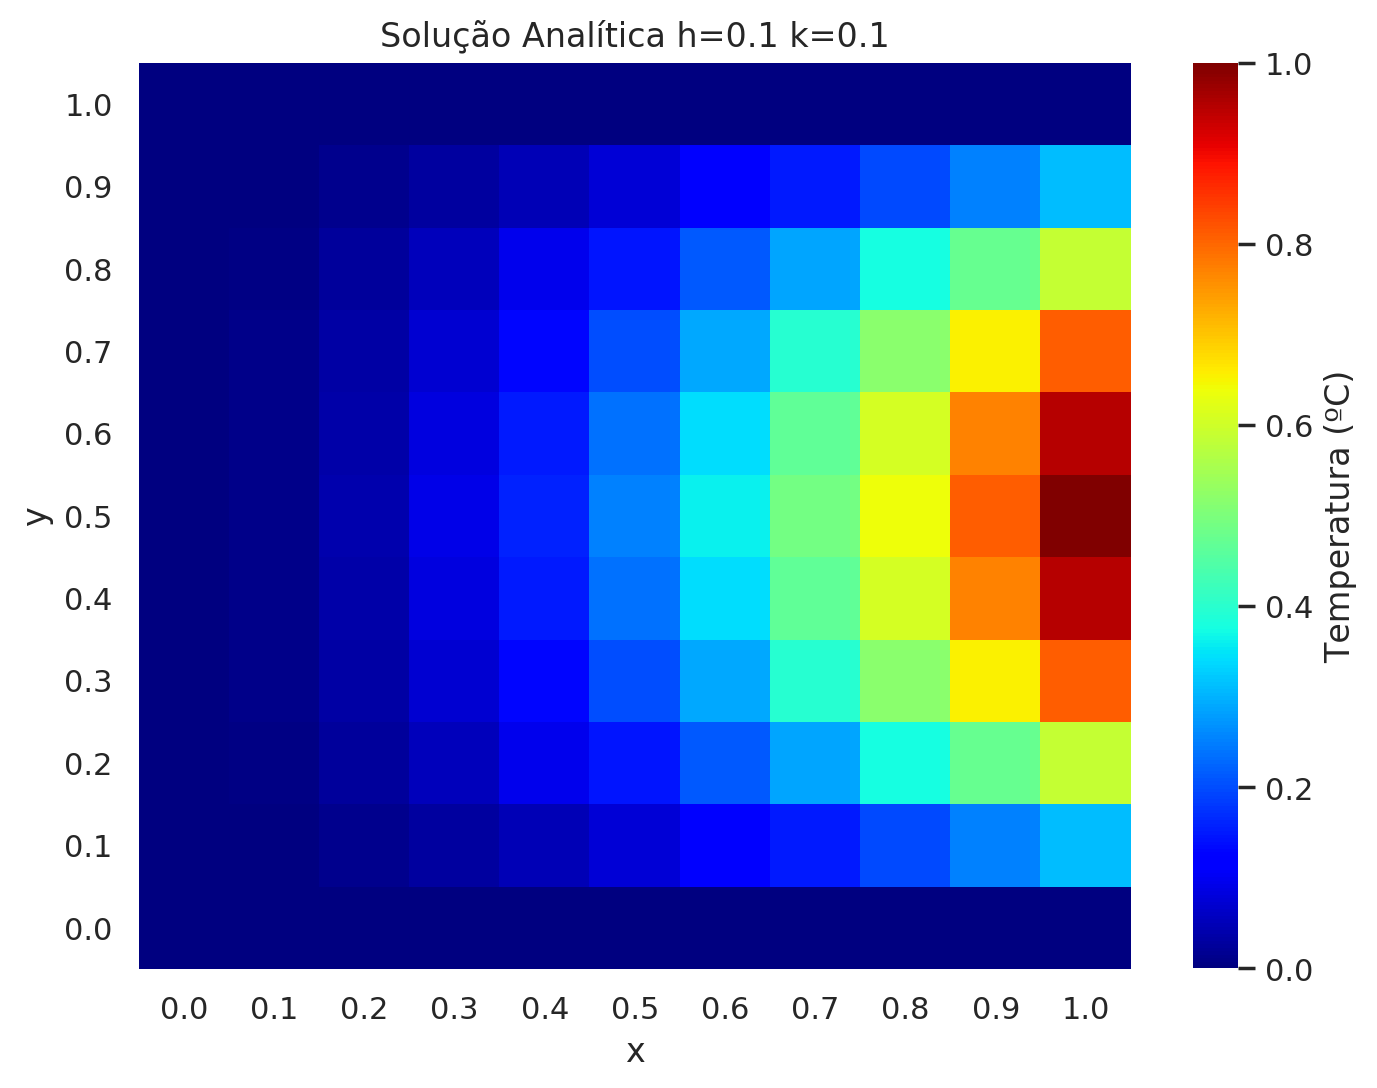

In [72]:
def soma(x, y):
    s = 0
    for n in range(0, 101):
        s+=(((-1)**n)/(2*n+1)**3) * (1/np.cosh(((2*n+1)*np.pi)/2))*np.cosh(((2*n+1)*np.pi*x)/2)*np.cos(((2*n+1)*np.pi*y)/2)
    return s

def sol_analitica(a, b, h, k, M, n):
    u = np.zeros((M, n))
    x = np.linspace(a, b, n)
    y = np.linspace(a, b, n)
    print(x)
    for i in range(len(x)):
        for j in range(len(y)):
            u[i, j] = analytic(x[i], y[j])
    return u    

u_a = sol_analitica(a, b, h, k, n, n)
print_res(u_a, n, n, a, a, b, h, k, metodo="Solução Analítica", print_annot=False, title=True)

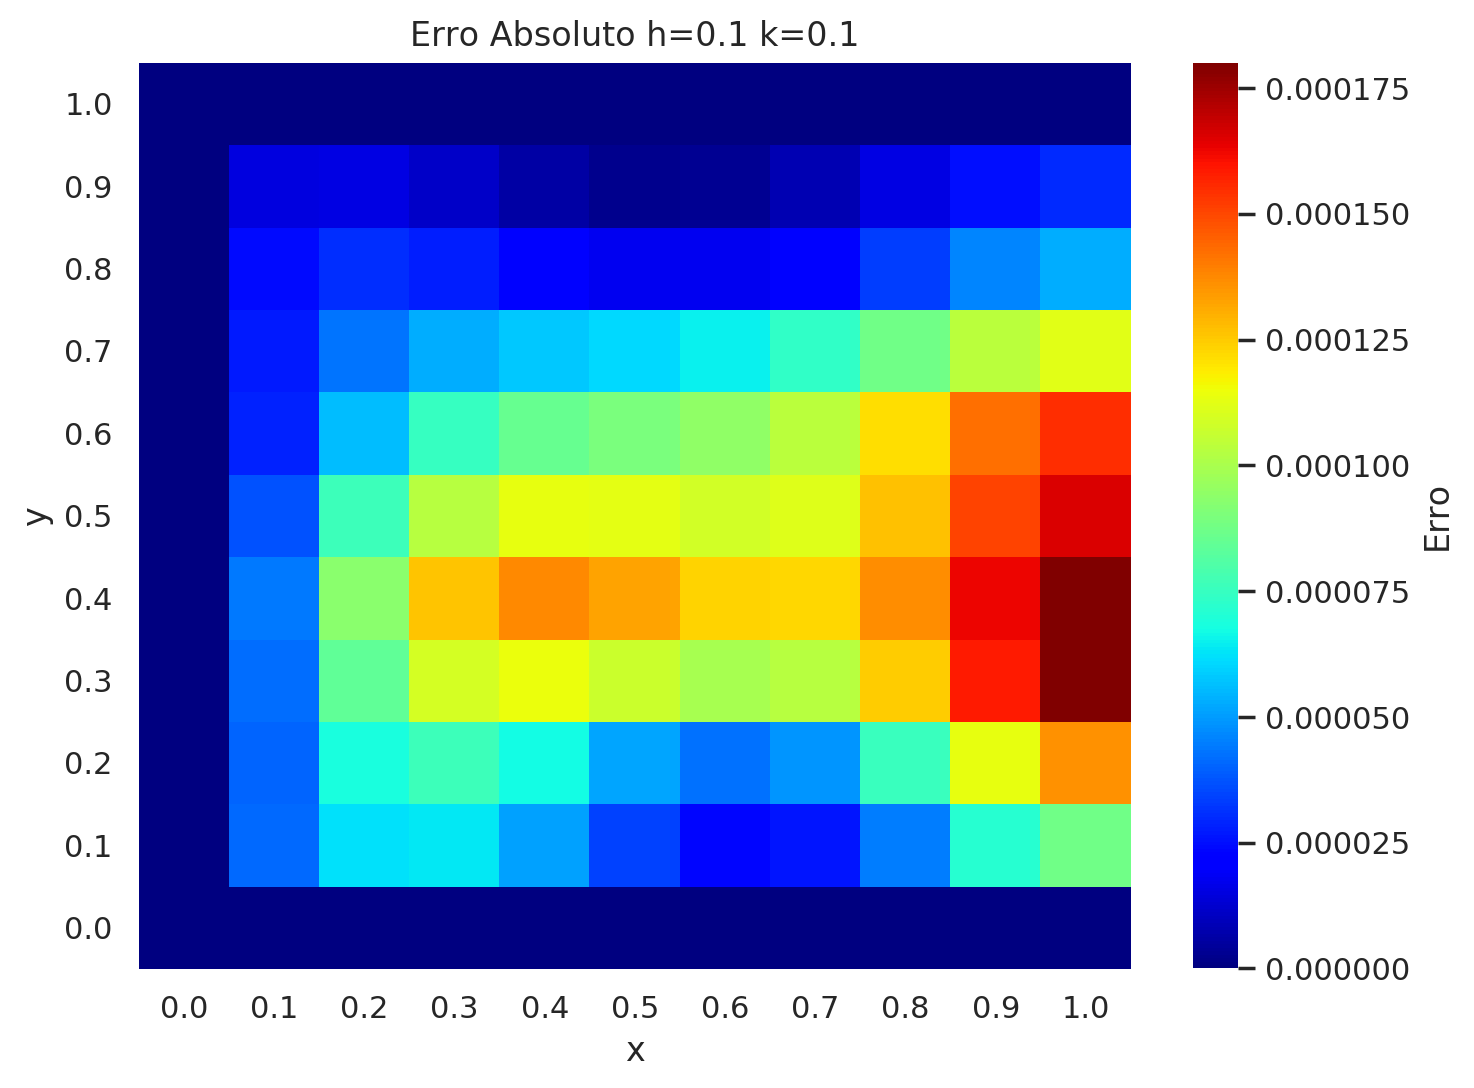

In [74]:
erro = np.absolute(u_a-res)


x_ticks = np.linspace(a, b, n).round(1)
y_ticks = np.linspace(a, b, n).round(1)
title = 'Erro Absoluto' + ' h=' + str(h) + ' k=' + str(k)

plt.figure(dpi=200, figsize=(8, 6))
plt.title(title)
ax = sns.heatmap(erro, cmap='jet', xticklabels =1, yticklabels =1,cbar_kws={'label': 'Erro'})

ax.set_xticklabels(x_ticks)
ax.set_yticklabels(y_ticks)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.yticks(rotation=0)
plt.xticks(rotation=0)

ax.invert_yaxis()
plt.show()